# Aula 4 - Entrega 01
**fast.ai aula 01**

Nina Amaral Boechat de Souza

In [49]:
!pip install -Uqq fastai

In [48]:
!pip install duckduckgo_search==2.9.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: duckduckgo_search
    Found existing installation: duckduckgo-search 3.9.3
    Uninstalling duckduckgo-search-3.9.3:
      Successfully uninstalled duckduckgo-search-3.9.3


# exemplo de imagem de gato:

In [51]:
urls = search_images('cat photos', max_images=1)
urls[0]

searching for 'cat photos'


'https://4.bp.blogspot.com/-W-Q7_l1OoxY/UWAJSrtvn_I/AAAAAAAASVM/eMqye-hpAu4/s1600/world-s-cutest-kitten.jpg'

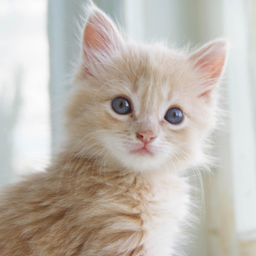

In [52]:
from fastdownload import download_url
dest = 'cat.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

# exemplo de imagem de banana:

In [61]:
urls = search_images('banana photos', max_images=1)
urls[0]

searching for 'banana photos'


'http://www.hdwallpapersdepotpro.com/wp-content/uploads/2012/09/bananas-Hd-wallpaper12.jpg'

searching for 'banana photos'


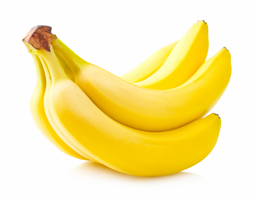

In [62]:
download_url(search_images('banana photos', max_images=1)[0], 'banana.jpg', show_progress=False)
Image.open('banana.jpg').to_thumb(256,256)

# gatos e bananas:

In [71]:
searches = 'banana','cat'
path = Path('cat_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} yellow photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} old photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

searching for 'banana photo'
searching for 'banana yellow photo'
searching for 'banana old photo'


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


searching for 'cat photo'
searching for 'cat yellow photo'
searching for 'cat old photo'


In [73]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

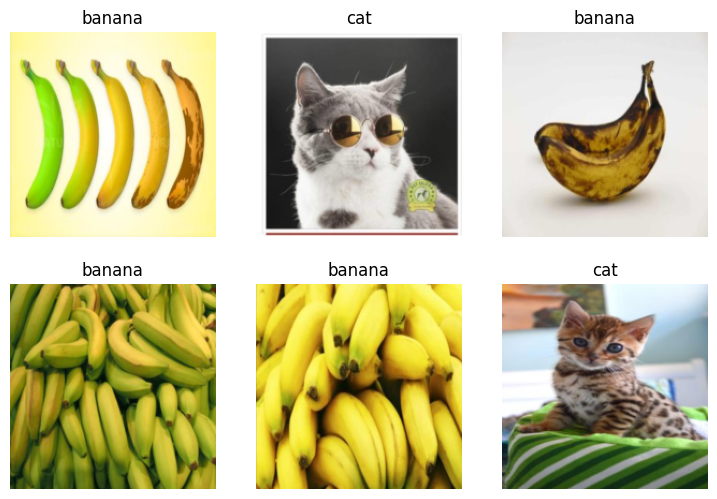

In [76]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [82]:
blocks=(ImageBlock, CategoryBlock),
get_items=get_image_files, 
splitter=RandomSplitter(valid_pct=0.2, seed=42),
get_y=parent_label,
item_tfms=[Resize(192, method='squish')]

# aprendendo a diferença entre gato e banana:

In [83]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 297MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.558700,0.124063,0.049383,00:16


epoch,train_loss,valid_loss,error_rate,time
0,0.100867,0.032482,0.012346,00:25
1,0.052623,0.010642,0.000000,00:25
2,0.040003,0.009654,0.000000,00:25


# gato ou banana?

**EXEMPLO 1**

searching for 'kitty cat image'


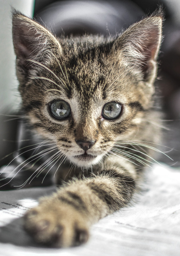

In [100]:
download_url(search_images('kitty cat image', max_images=1)[0], 'kitty.jpg', show_progress=False)
Image.open('kitty.jpg').to_thumb(256,256)


In [101]:

is_cat,_,probs = learn.predict(PILImage.create('kitty.jpg'))
print(f"This is a: {is_cat}.")
print(f"Probability it's a banana: {probs[0]:.4f}")

This is a: cat.
Probability it's a banana: 0.0000


**EXEMPLO 2**

searching for 'brown banana image'


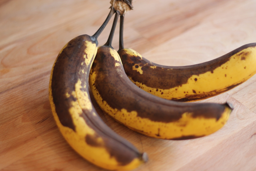

In [102]:
download_url(search_images('brown banana image', max_images=1)[0], 'bananana.jpg', show_progress=False)
Image.open('bananana.jpg').to_thumb(256,256)


In [103]:
is_cat,_,probs = learn.predict(PILImage.create('bananana.jpg'))
print(f"This is a: {is_cat}.")
print(f"Probability it's a banana: {probs[0]:.4f}")

This is a: banana.
Probability it's a banana: 0.9992


**BONUS**

searching for 'banana cat image'


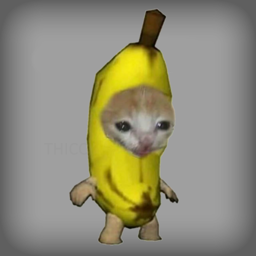

In [95]:
download_url(search_images('banana cat image', max_images=1)[0], 'bananya.jpg', show_progress=False)
Image.open('bananya.jpg').to_thumb(256,256)

In [96]:
is_cat,_,probs = learn.predict(PILImage.create('bananya.jpg'))
print(f"This is a: {is_cat}.")
print(f"Probability it's a banana: {probs[0]:.4f}")

This is a: cat.
Probability it's a banana: 0.4266
